# **Final Project 2**
## **1. Perkenalan**

Nama Anggota Kelompok :
1. Muhammad Rafi Ramadhan / PYTN-KS12-002
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Carenina Amanda Putri / PYTN-KS12-017



### 1.1 Latar Belakang

Data cuaca merupakan salah satu data yang penting dalam berbagai bidang seperti pertanian, transportasi, pariwisata, dan sebagainya. Namun, data cuaca tersebut seringkali tidak terorganisir dengan baik sehingga sulit untuk dianalisis. Oleh karena itu, perlu dilakukan pengolahan data agar data cuaca tersebut dapat dimanfaatkan dengan maksimal.

Pada proyek ini, akan dilakukan pengolahan data cuaca dari dataset Weather Dataset Rattle Package yang berisi data cuaca di Australia. Data ini memiliki informasi mengenai cuaca pada hari ini dan prediksi cuaca untuk besok. Data tersebut mencakup variabel seperti suhu, kelembapan, tekanan udara, kecepatan angin, serta informasi apakah akan hujan pada hari ini dan besok.

Dalam proyek ini, akan dilakukan beberapa tahap pengolahan data, seperti pembersihan data, eksplorasi data, serta pembuatan model prediksi untuk memprediksi apakah akan hujan pada besoknya. Dengan melakukan pengolahan data ini, diharapkan data cuaca yang tidak terorganisir dapat diolah menjadi informasi yang lebih berguna dan dapat membantu dalam berbagai bidang.

## 1.2 Objektif
- Mampu memahami konsep Classiﬁcation dengan Logistic Regression dan SVM
-  Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM
-  Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

## **2. Import Data**
Pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import folium
import statistics
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_files, load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from nltk import FreqDist, NaiveBayesClassifier
from flask import Flask, request, jsonify, render_template
%matplotlib inline
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore')

## **3. Data Loading**


## 3.1 Read Dataframe dari source CSV
Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe **Weather AUS**, yang kemudian menampilkan data teratas

In [76]:
df = pd.read_csv('E:/Kuliah/Semester 6/Hacktiv8/Final Project/FP 2/weatherAUS.csv')
pd.set_option('display.max_columns', None)


## 3.2 Menampilkan 5 data teratas

In [4]:
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head()

Dataset berisi 145460 baris dan 23 kolom (atribut)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 3.3 Melihat data terbawah

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### 3.4 Melihat dimensi dari dataset

In [6]:
df.shape

(145460, 23)

Dapat diketahui bahwa dataset yang digunakan terdiri dari 23 kolom dan 145460 baris.

### 3.5 Melihat informasi kolom, baris, dan data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Keterangan:

1.	**Date** - tanggal hari itu
2.	**Location** - lokasi, nama kota di Australia
3.	**MinTemp** - temperatur terendah hari itu dalam celcius
4.	**MaxTemp** - temperatur tertinggi hari itu dalam celcius
5.	**Rainfall** - jumlah curah hujan hari itu dalam mm
6.	**Evaporation** - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7.	**Sunshine** - jumlah jam hari itu cerah dengan cahaya matahari
8.	**WindGustDir** - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9.	**WindGustSpeed** - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10.	**WindDir9am** - arah angin jam 9 pagi
11.	**WindDir3pm** - arah angin jam 3 sore
12.	**WindSpeed9am** - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13.	**WindSpeed3pm** - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14.	**Humidity9am** - humiditas jam 9 pagi dalam persen
15.	**Humidity3pm** - humiditas jam 3 sore dalam persen
16.	**Pressure9am** - tekanan udara jam 9 pagi dalam hpa
17.	**Pressure3pm** - tekanan udara jam 3 sore dalam hpa
18.	**Cloud9am** - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19.	**Cloud3pm** - persentase langit yang tertutup awan jam 3 sore
20.	**Temp9am** - temperatur jam 9 pagi dalam celcius
21.	**Temp3pm** - temperatur jam 3 sore dalam celcius
22.	**RainToday** - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23.	**RainTomorrow** - variable yang mau di prediksi



### 3.6 Melihat Statistik Dataframe secara umum

Karena dataset ini memiliki 2 tipe data yaitu float, dan object maka statistik ditampilkan per tipe data.

#### 3.6.1 Mengecek statistik deskriptif dari masing-masing atribut yang bertipe float

In [8]:
df.describe(include='float' )

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### 3.6.2 Mengecek statistik deskriptif dari masing-masing atribut yang bertipe objek

In [9]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### 3.7 Melihat banyaknya unique values untuk tiap atribut.

In [10]:
for col in df.columns:
    print(col,': ', df[col].nunique())

Date :  3436
Location :  49
MinTemp :  389
MaxTemp :  505
Rainfall :  681
Evaporation :  358
Sunshine :  145
WindGustDir :  16
WindGustSpeed :  67
WindDir9am :  16
WindDir3pm :  16
WindSpeed9am :  43
WindSpeed3pm :  44
Humidity9am :  101
Humidity3pm :  101
Pressure9am :  546
Pressure3pm :  549
Cloud9am :  10
Cloud3pm :  10
Temp9am :  441
Temp3pm :  502
RainToday :  2
RainTomorrow :  2


## 4. Data Cleaning

### 4.1 Mengecek apakah terdapat duplikat value pada dataset

In [11]:
df.duplicated().sum()

0

### 4.2 Menampilkan jumlah serta persentase dari missing value yang terdapat pada dataset

In [12]:
mv = pd.DataFrame({"Missing Value":df.isna().sum(), "Persentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
mv


,Missing Value,Persentase
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


### 4.3 Drop Attribut yang memiliki persentase missing value diatas 35 persen

In [13]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)

In [14]:
df.shape

(145460, 19)

Dapat terlihat bahwa jumlah attribut yang ada berkurang dari 23 menjadi 19 buah.

In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### 4.4 Mengisi Missing Value

In [16]:
df1=df.copy()
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### 4.4.1 Mengisi missing value pada attribut beripe data categorical

Ringkasan variabel kategori

- Ada variabel tanggal. Itu dilambangkan dengan kolom `Tanggal`.

- Ada 6 variabel kategori. Ini diberikan oleh `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` dan `RainTomorrow`.

- Ada dua variabel kategorikal boolean - `RainToday` dan `RainTomorrow`.

- `RainTomorrow` adalah variabel target.

In [17]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_cols:
    df1[col] = df1[col].astype('category')

# fill missing values with backward forward filling
df1[categorical_cols] = df1[categorical_cols].fillna(method='bfill').fillna(method='ffill')

In [18]:
df1[categorical_cols].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [19]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Dapat terlihat bahwa tidak lagi missing value pada attribut yang memiliki tipe data categorical setelah melakukan pengisian menggunakan metode backward forward filling.

#### 4.4.2 Mengisi missing value pada attribut yang memiliki tipe data numerik 


Untuk mengisi data yang hilang pada fitur numerik, dapat digunakan nilai rata-rata (mean) atau nilai tengah (median). Namun, harus diingat bahwa nilai rata-rata dapat dipengaruhi oleh nilai yang sangat jauh dari mayoritas data (outlier), sedangkan nilai tengah tidak dipengaruhi oleh outlier. Oleh karena itu, jika ingin memilih untuk mengisi nilai yang hilang dengan nilai rata-rata, pastikan bahwa outlier pada fitur numerik sudah ditangani dengan benar terlebih dahulu.

In [20]:
# Megetahui kolom yang memiliki tipe data numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


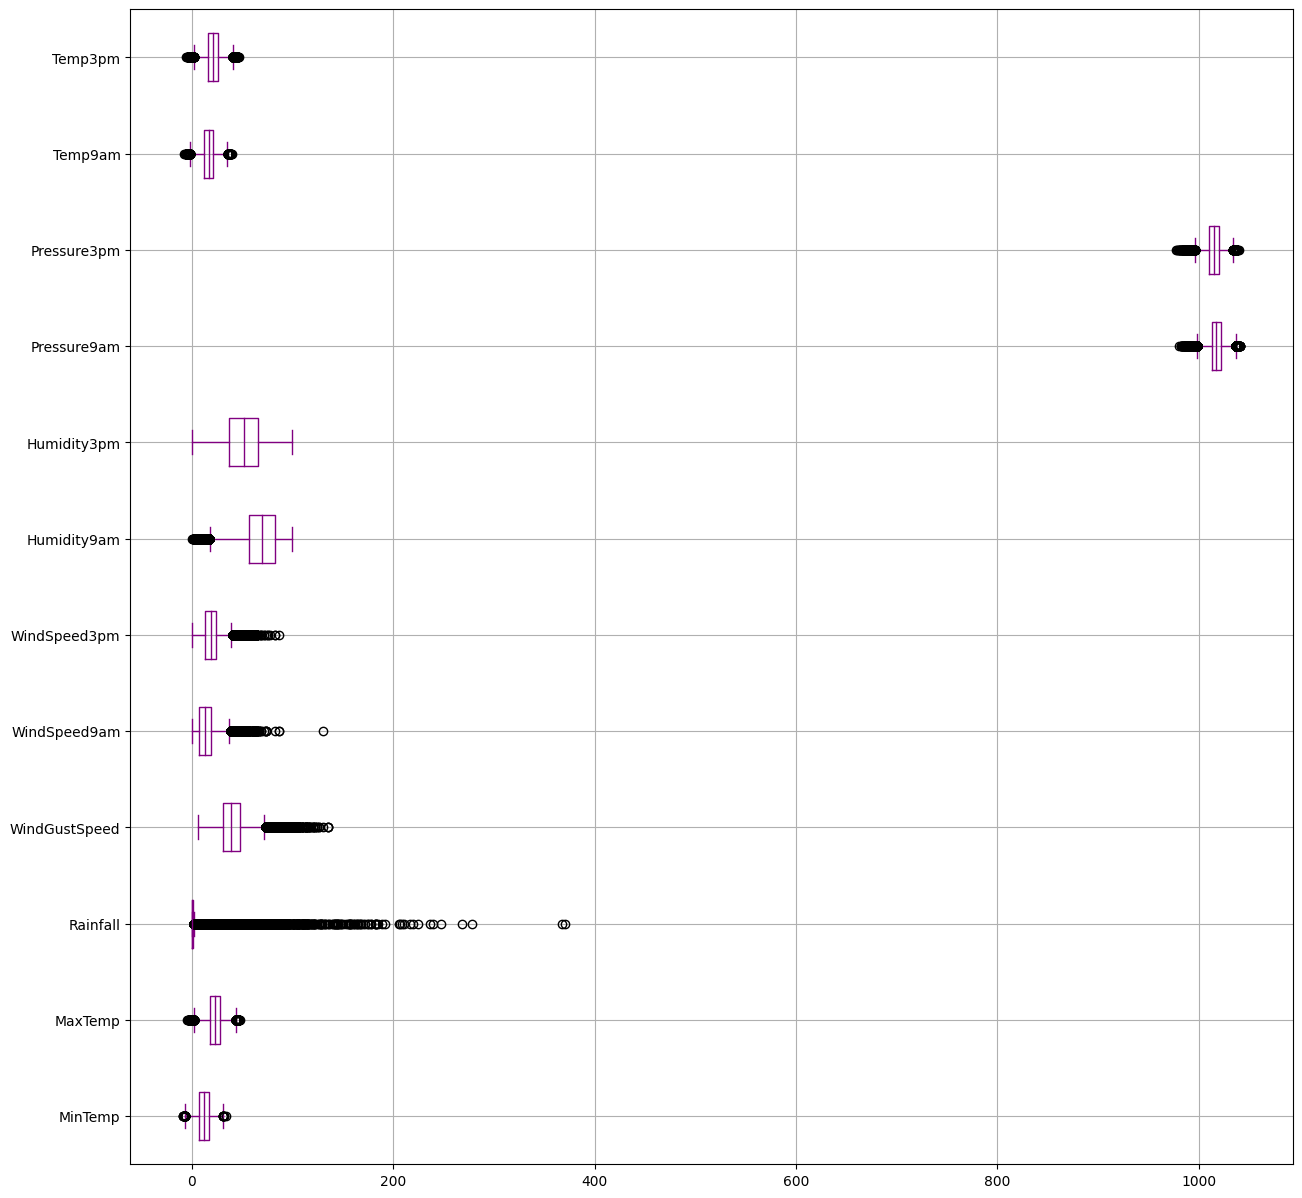

In [21]:
# Mengisi missing values menggunakan median
plt.show()
df1[num_cols].boxplot(figsize=(15,15), vert=False, color='purple')
plt.show()

Dikarenakan masih banyak outlier sehingga kita harus menghilangkannya terlebih dahulu menggunakan metode IQR Outlier Removal.

In [22]:
outliers_data = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for data in outliers_data:
    q1 = df1[data].quantile(0.25)
    q3 = df1[data].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    df1.loc[df1[data] < lower_limit, data] = lower_limit
    df1.loc[df1[data] > upper_limit, data] = upper_limit

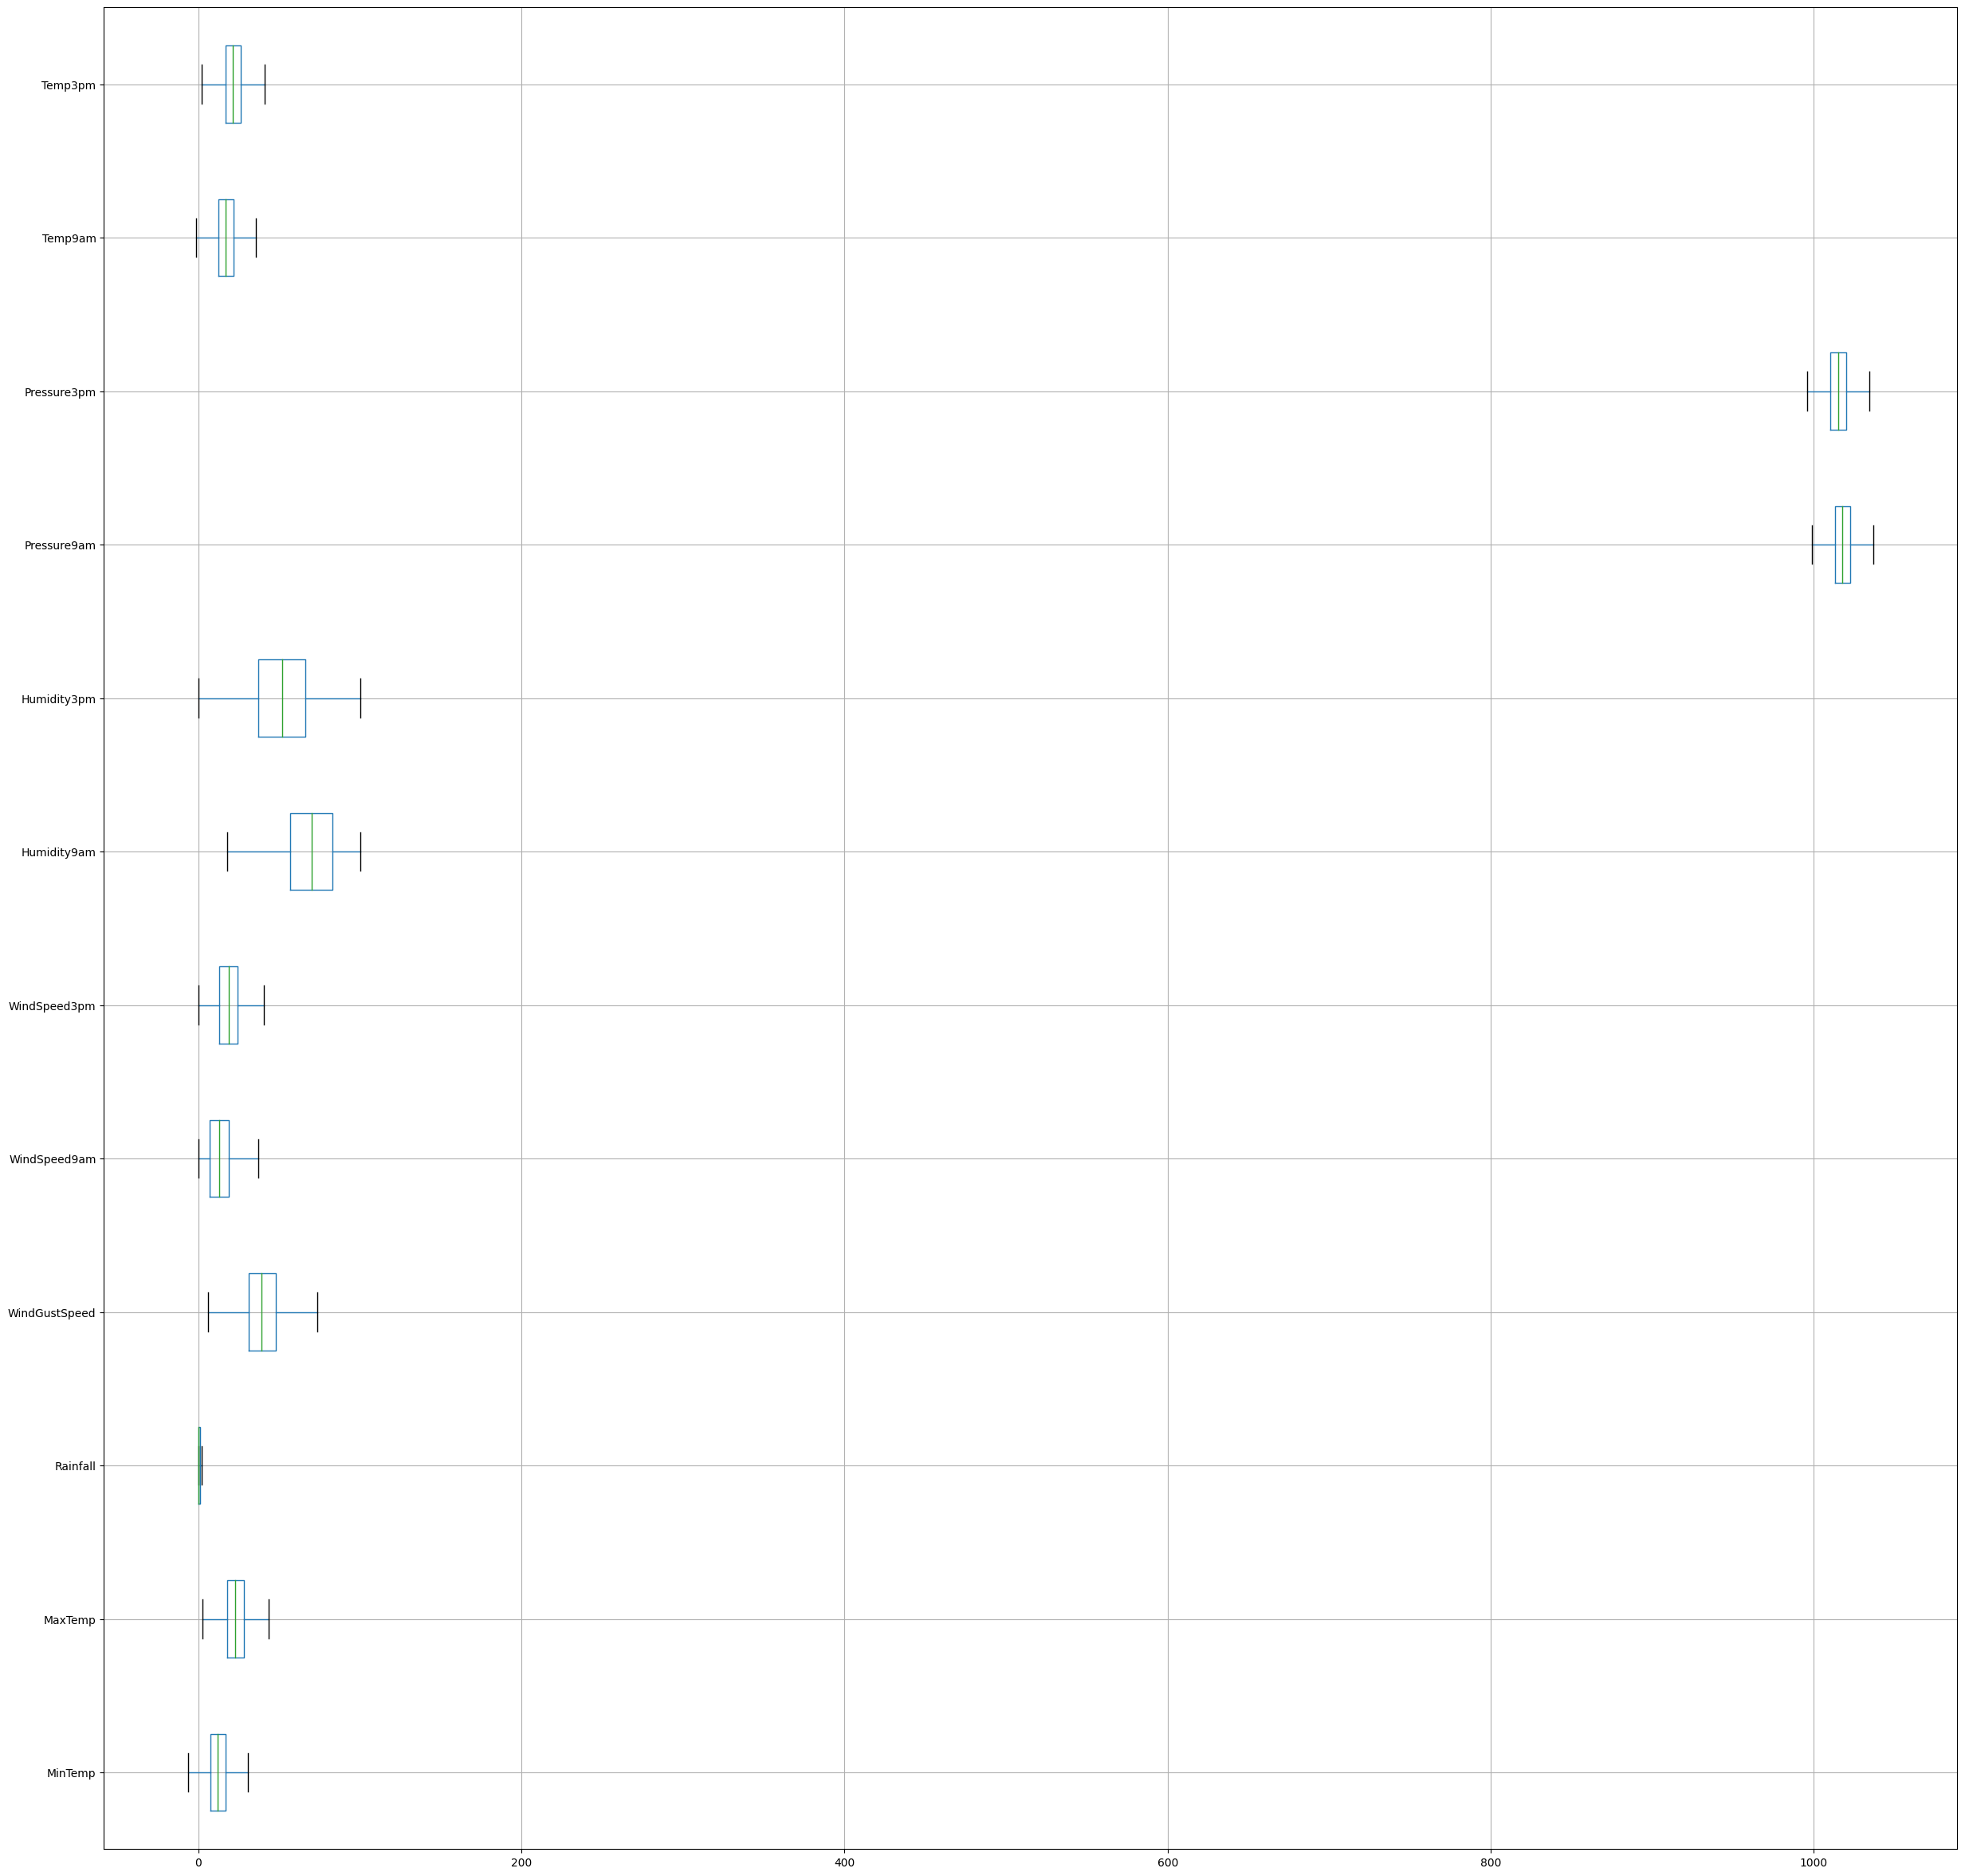

In [23]:
df1[num_cols].boxplot(figsize=(30,30), vert=False)
plt.show()

Karena outliers telah ditangani maka kita dapat menggunakan mean untuk mengisi missing value pada data numerikal.

In [24]:
for col in num_cols:
    if df1[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df1[col].fillna(mean_value, inplace=True)
      

In [25]:
df1[num_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

Pengisian missing value untuk data numerik telah berhasil dilakukan menggunakan mean, karna pada awalnya terdapat banyak outliers maka harus dihilangkan terlebih menggunakan metode IQR Outlier Removal.

### 4.5 Mengubah kolom 'Date' menjadi tipe data datetime

In [26]:
df1['Date'] = pd.to_datetime(df['Date'])
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008



Mengubah kolom 'date' menjadi tipe data datetime merupakan langkah penting dalam melakukan analisis data, karena kolom tersebut menyimpan informasi tanggal dan waktu. Dengan mengubah tipe data kolom 'date' menjadi datetime, kita dapat dengan mudah memanipulasi data tanggal dan waktu untuk menjawab pertanyaan analisis yang berkaitan dengan tren, musiman, dan pola data. Selain itu, dengan tipe data datetime, kita juga dapat melakukan agregasi data berdasarkan tanggal dan waktu seperti mingguan, bulanan, dan tahunan. Hal ini akan memudahkan kita dalam melakukan pemodelan dan membuat prediksi yang akurat berdasarkan data historis yang ada.

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  category      
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  category      
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  category      
 8   WindDir3pm     145460 non-null  category      
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [28]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


## **5. Explorasi Data Analysis**

In [29]:
df2 = df1.copy()

In [30]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


### 5.1 Data Query and Grouping

#### 5.1.1 Melakukan Query untuk Mendapatkan Data pada kota Perth pada Bulan Januari, dan Februari Tahun 2010

In [31]:
df_query = df2.query("Location=='Perth' & Date > '2010-01-01' & Date < '2010-03-01'")
df_query


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
121188,2010-01-02,Perth,17.0,36.5,0.0,E,31.0,E,E,15.0,9.0,39.0,17.0,1018.1,1014.2,24.8,36.3,No,No,2,1,2010
121189,2010-01-03,Perth,20.8,39.9,0.0,S,37.0,NE,SSW,22.0,19.0,18.0,22.0,1012.2,1009.1,31.2,35.2,No,No,3,1,2010
121190,2010-01-04,Perth,20.9,36.6,0.0,SSE,44.0,SE,ESE,17.0,15.0,39.0,20.0,1009.4,1005.3,25.5,36.4,No,No,4,1,2010
121191,2010-01-05,Perth,18.8,37.3,0.0,E,39.0,E,SSW,17.0,15.0,45.0,24.0,1007.6,1004.2,25.2,36.6,No,No,5,1,2010
121192,2010-01-06,Perth,22.1,33.0,0.0,ESE,37.0,NNE,WNW,7.0,17.0,45.0,62.0,1003.7,1005.6,27.6,27.3,No,No,6,1,2010
121193,2010-01-07,Perth,17.0,27.4,0.0,SSW,43.0,SSE,SW,13.0,24.0,60.0,59.0,1011.2,1009.2,21.9,25.2,No,No,7,1,2010
121194,2010-01-08,Perth,15.9,31.4,0.0,SW,37.0,SE,SSW,9.0,20.0,51.0,50.0,1011.5,1008.5,24.6,27.6,No,No,8,1,2010
121195,2010-01-09,Perth,19.7,31.4,0.0,SSW,43.0,SE,SW,9.0,22.0,39.0,42.0,1006.6,1006.4,27.0,27.4,No,No,9,1,2010
121196,2010-01-10,Perth,16.3,25.5,0.0,SW,48.0,SSW,SSW,11.0,28.0,61.0,48.0,1011.1,1009.7,22.7,24.0,No,No,10,1,2010
121197,2010-01-11,Perth,14.4,23.9,0.0,SSW,44.0,S,SSW,15.0,24.0,44.0,45.0,1016.1,1014.0,20.6,23.2,No,No,11,1,2010


#### 5.1.2 Mengelompokkan dan Menjumlahkan rata rata Suhu Tertinggi per Tahun di Setiap Lokasi sejak 2010

In [32]:
# Data Grouping
df_group = df2[(df2['Year'] >= 2010)].groupby(['Location','Year'])['MaxTemp'].mean()
df_group

Location  Year
Adelaide  2010    22.443562
          2011    22.677910
          2012    22.247164
          2013    22.863353
          2014    23.525205
                    ...    
Woomera   2013    26.824396
          2014    27.513014
          2015    26.540411
          2016    26.474180
          2017    28.135349
Name: MaxTemp, Length: 392, dtype: float64

### 5.2 Central Tendency

#### 5.2.1 Mean

In [33]:
# Menemukan waktu rata-rata dari kolom MinTemp
mean = df2['MinTemp'].mean()
print(mean)

12.194184250348751


#### 5.2.2 Modus

In [34]:
# Menemukan modus dari arah angin pada daerah australia
modus = df2['WindGustDir'].mode()
print(modus)

0    SSE
Name: WindGustDir, dtype: category
Categories (16, object): ['E', 'ENE', 'ESE', 'N', ..., 'SW', 'W', 'WNW', 'WSW']


#### 5.2.3 Median

In [35]:
median = statistics.median(df2['Pressure9am'])
print(median)

1017.6499397983179


Dapat dilihat beberapa nilai statistik dasar dari beberapa kolom pada dataset. Nilai mean atau rata-rata dari kolom MinTemp adalah 12.18640057012894. Sedangkan, untuk mencari modus dari kolom WindGustDir  menghasilkan output 'SSE' yang berarti pada daerah australia angin lebih sering datang dari arah selatan tenggara. Terakhir, median atau nilai tengah dari kolom Pressure9am adalah 1017.6. Informasi ini dapat membantu kita untuk memahami distribusi data pada dataset dan membentuk asumsi awal dalam membuat model machine learning yang lebih akurat.

### 5.3 Variability

In [36]:
# Mencari variabilitas pada kolom 'MinTemp'
variance = np.var(df2['MinTemp'])
std_dev = np.std(df2['MinTemp'])
z = df2['MinTemp']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi kolom MinTemp:", variance)
print("Standar deviasi kolom MinTemp:", std_dev)
print("Skewness: ", z.skew())
print("Percentile: ", percentile)
print("Range: ", jangkauan)

Variansi kolom MinTemp: 40.51294560678993
Standar deviasi kolom MinTemp: 6.3649780523415735
Skewness:  0.021861046132647353
Percentile:  [ 7.7 12.1 16.8]
Range:  37.199999999999996


Dari analisa variabilitas kolom 'MinTemp' pada dataset, ditemukan nilai variansinya yang cukup besar sebesar 40.51 dan standar deviasi sebesar 6.36. Meskipun demikian, distribusi data cenderung normal dengan nilai skewness sebesar 0.02. Hasil persentil menunjukkan bahwa sekitar 50% data memiliki nilai suhu minimum antara 7.7 dan 12.1. Rentang nilai suhu minimum pada dataset adalah 37.2, menunjukkan perbedaan yang signifikan antara suhu minimum tertinggi dan terendah pada setiap lokasi.

### 5.4 Visualisasi Sederhana

#### 5.4.1 Intensitas Curah Hujan Wilayah Cairns per Tahun

   Date  Rainfall
0  2008  0.645161
1  2009  0.581370
2  2010  0.844384
3  2011  0.631642
4  2012  0.569436
5  2013  0.729970
6  2014  0.646254
7  2015  0.703014
8  2016  0.865640
9  2017  0.904545


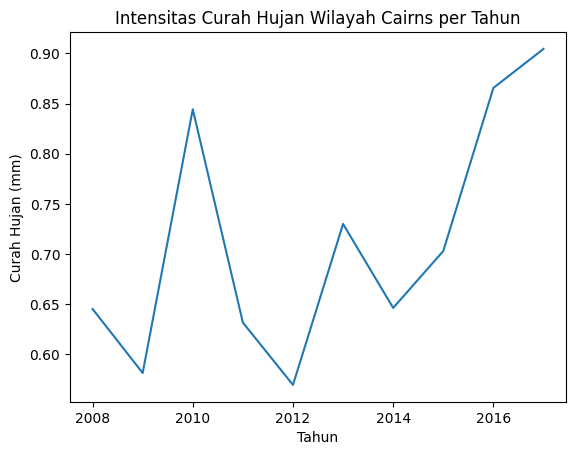

In [37]:
df_cairns = df2[df2['Location'] == 'Cairns']

# Group data berdasarkan tahun dan menghitung rata-rata curah hujan
df_cairns_yearly = df_cairns.groupby(df_cairns['Date'].dt.year)['Rainfall'].mean().reset_index()
print(df_cairns_yearly)

# Plot line chart
plt.plot(df_cairns_yearly['Date'], df_cairns_yearly['Rainfall'])
plt.title('Intensitas Curah Hujan Wilayah Cairns per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.show()




Dari hasil plot line 'Intensitas Curah Hujan Wilayah Cairns per Tahun', dapat dilihat bahwa intensitas curah hujan di wilayah tersebut cenderung stabil dari tahun ke tahun, namun terdapat sedikit fluktuasi di beberapa tahun tertentu. Pada tahun 2017, terjadi peningkatan yang signifikan dalam intensitas curah hujan dibandingkan dengan tahun-tahun sebelumnya. Penurunan atau kenaikan intensitas curah hujan dapat menjadi indikasi adanya perubahan cuaca atau iklim di wilayah tersebut. Selain itu, informasi penting juga dapat diperoleh dari rata-rata intensitas curah hujan yang cukup tinggi, yaitu sekitar 0.7-0.9, yang dapat berdampak pada sektor pertanian atau pariwisata di wilayah Cairns.

#### 5.4.2 Jumlah Hari Terjadi Hujan per Wilayah Selama 2008-2017

            Location  Hari Hujan
0           Adelaide         738
1             Albany         915
2             Albury         622
3       AliceSprings         246
4      BadgerysCreek         598
5           Ballarat         783
6            Bendigo         564
7           Brisbane         714
8             Cairns         980
9           Canberra         633
10             Cobar         392
11      CoffsHarbour         878
12          Dartmoor         923
13            Darwin         852
14         GoldCoast         791
15            Hobart         764
16         Katherine         278
17        Launceston         710
18         Melbourne        1329
19  MelbourneAirport         653
20           Mildura         327
21             Moree         493
22      MountGambier         927
23       MountGinini         871
24         Newcastle         797
25              Nhil         242
26         NorahHead         832
27     NorfolkIsland         941
28         Nuriootpa         596
29        

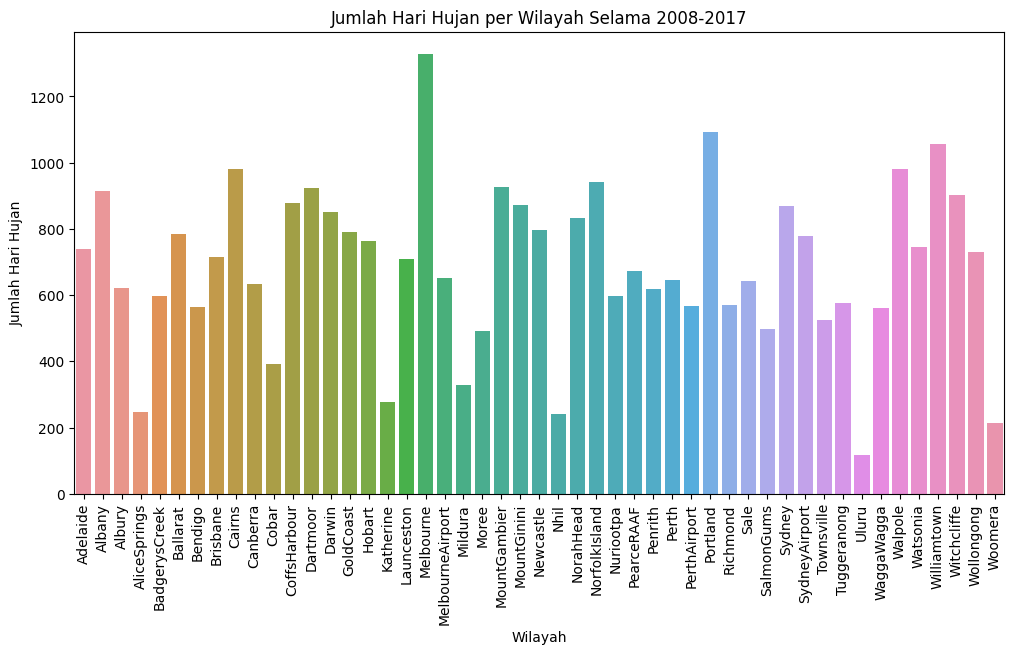

In [38]:
# subset data hanya untuk hari hujan
df_rain = df2[df2['RainToday']=='Yes']

# hitung jumlah hari hujan per wilayah
df_rain_days = df_rain.groupby('Location')['RainToday'].count().reset_index(name='Hari Hujan')
print(df_rain_days)

# buat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Hari Hujan', data=df_rain_days)
plt.title('Jumlah Hari Hujan per Wilayah Selama 2008-2017')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Hari Hujan')
plt.xticks(rotation=90)
plt.show()

Dapat dilihat bahwa wilayah Cairns memiliki jumlah hari hujan tertinggi di antara semua wilayah dengan total 980 hari hujan, diikuti oleh Williamtown dengan 1055 hari hujan, dan Portland dengan 1094 hari hujan. Sementara itu, wilayah Uluru memiliki jumlah hari hujan yang paling sedikit, yaitu hanya 117 hari hujan selama sepuluh tahun terakhir.

Perlu diperhatikan bahwa data yang digunakan adalah jumlah hari hujan selama periode 2008-2017, bukan jumlah hari hujan pertahun. Meskipun demikian, rata-rata jumlah hari hujan di semua wilayah tergolong cukup tinggi, yaitu berkisar antara 500 hingga 1000 hari hujan dalam sepuluh tahun terakhir. Hal ini menunjukkan bahwa cuaca di Australia cenderung basah dan lembab di banyak wilayahnya, yang dapat memengaruhi sektor pertanian, pariwisata, dan infrastruktur di daerah-daerah tersebut.

#### 5.4.3 Distribusi Arah Angin di Australia

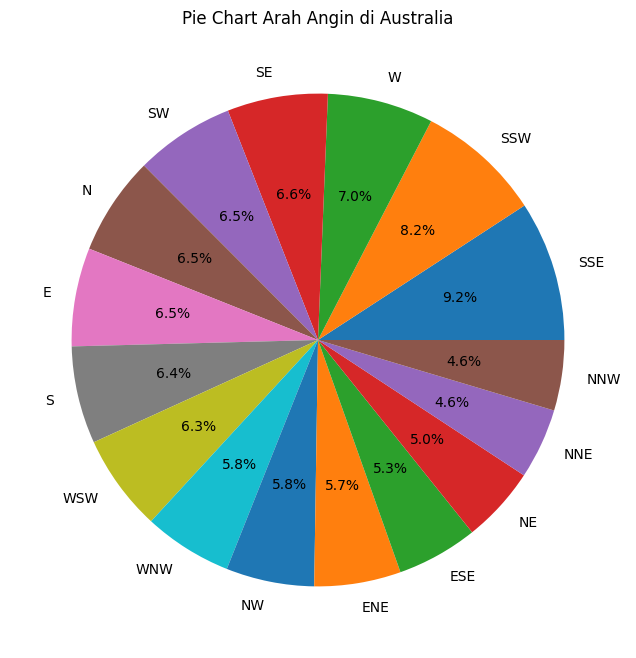

In [39]:
wind_gust_dir = df2['WindGustDir'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(wind_gust_dir, labels=wind_gust_dir.index, autopct='%1.1f%%')
plt.title('Pie Chart Arah Angin di Australia')
plt.show()


Pie chart di atas menampilkan distribusi arah angin (WindGustDir) di Australia selama 2008-2017. Dapat dilihat bahwa angin dari arah SSE merupakan arah angin yang paling sering terjadi dengan jumlah mencapai 9,2%. Sedangkan arah angin terendah adalah NNW dan NNE yang hanya mencapai 4,6% dari total seluruh arah angin. Hal ini menunjukkan bahwa arah angin SSE lebih sering terjadi di Australia dibandingkan dengan arah angin lainnya. Arah angin yang lainnya juga terdistribusi cukup merata dan memiliki jumlah yang hampir sama.

#### 5.4.4 Korelasi Antar Variable

Membuat gambar (figure) dengan ukuran 18 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_corr) dengan rotasi 90

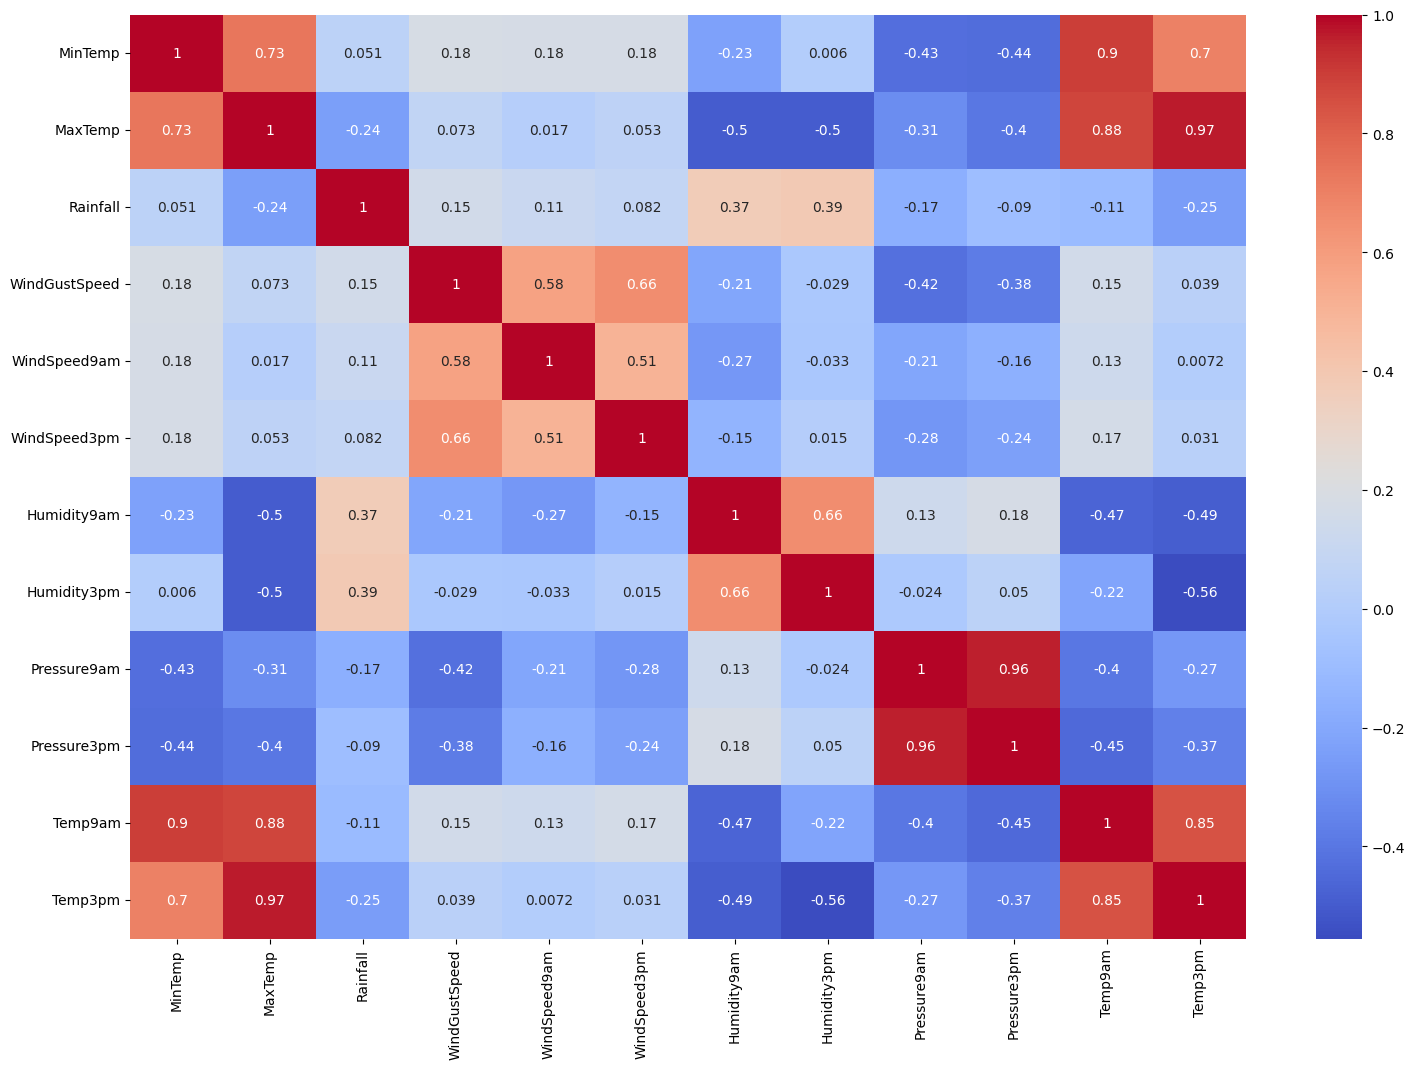

In [40]:
heatmap_data = df2.drop(['Year', 'Month', 'Day'], axis=1)
plt.figure(figsize=(18,12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()


Berdasarkan heatmap korelasi pada dataset yang diberikan, terlihat bahwa terdapat korelasi positif yang cukup tinggi antara RainToday (apakah hujan hari ini) dan Humidity3pm (kelembaban relatif udara pada pukul 3 sore), yaitu sekitar 0.45. Hal ini menunjukkan bahwa jika kelembaban relatif udara pada pukul 3 sore tinggi, kemungkinan besar akan terjadi hujan pada hari itu.

Selain itu, hasil heatmap juga menunjukkan bahwa kecepatan angin pada pukul 3 sore (WindSpeed3pm) tidak terlalu dipengaruhi oleh tekanan udara di pagi atau sore hari sebelumnya (Pressure9am dan Pressure3pm) karena korelasinya cukup lemah.

#### 5.4.5 WindGustDir, WindDir9am, dan WindDir3pm dengan Target

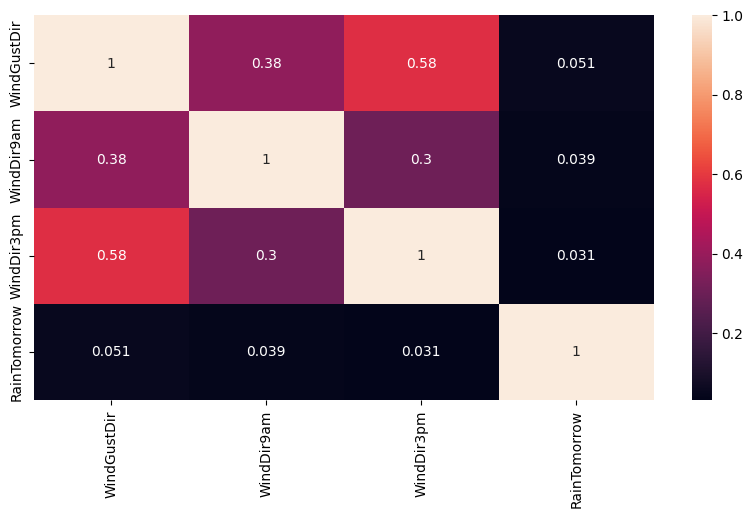

In [41]:
dff = df2.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()


Berdasarkan heatmap korelasi diatas, terlihat bahwa atribut WindGustDir memiliki korelasi positif yang lemah dengan kemungkinan terjadinya hujan pada esok hari. Dalam arti lain, jika arah angin pada saat gust memiliki arah tertentu, kemungkinan terjadinya hujan pada esok hari lebih besar. Namun, untuk atribut WindDir9am dan WindDir3pm, korelasinya dengan RainTomorrow sangat kecil. Hal ini menunjukkan bahwa arah angin pada pukul 9 pagi atau pukul 3 sore tidak berpengaruh signifikan pada kemungkinan terjadinya hujan pada esok hari. Analisa ini menggunakan RainTomorrow sebagai target variabel yang ingin diprediksi di masa yang akan datang, sedangkan atribut lain seperti WindGustDir, WindDir9am, dan WindDir3pm digunakan sebagai fitur variabel.

## **6. Pre Processing**

In [42]:
df3=df2.copy()
df3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


### 6.1 Encode Untuk Tipe Data Category

In [43]:
df3['Location'] = le.fit_transform(df3['Location'])
df3['WindGustDir'] = le.fit_transform(df3['WindGustDir'])
df3['WindDir9am'] = le.fit_transform(df3['WindDir9am'])
df3['WindDir3pm'] = le.fit_transform(df3['WindDir3pm'])
df3['RainToday'] = le.fit_transform(df3['RainToday'])
df3['RainTomorrow'] = le.fit_transform(df3['RainTomorrow'])

In [44]:
df3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008


Kolom yang memiliki tipe data categorial telah berhasil diubah menjadi nilai numerik melalui label encoder. Dimana tujuan dilakukan ini adalah untuk mempermudah melakukan pemodelan.

### 6.2 Scaling Dataframe

In [45]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [46]:
scaler = MinMaxScaler()
df3[num_cols] = scaler.fit_transform(df3[num_cols])
df3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,2,0.530914,0.496359,0.254138,13,0.562963,13,14,0.540541,0.592593,0.646341,0.22,0.238158,0.289062,0.498656,0.507653,0,0,1,12,2008
1,2008-12-02,2,0.369624,0.549757,0.000000,14,0.562963,6,15,0.108108,0.543210,0.317073,0.25,0.314474,0.307292,0.506720,0.571429,0,0,2,12,2008
2,2008-12-03,2,0.517473,0.564320,0.000000,15,0.592593,13,15,0.513514,0.641975,0.243902,0.30,0.235526,0.330729,0.608871,0.543367,0,0,3,12,2008
3,2008-12-04,2,0.418011,0.620146,0.000000,4,0.266667,9,0,0.297297,0.222222,0.329268,0.16,0.498684,0.437500,0.530914,0.627551,0,0,4,12,2008
4,2008-12-05,2,0.641129,0.724515,0.423564,13,0.518519,1,7,0.189189,0.493827,0.780488,0.33,0.319737,0.260417,0.522849,0.709184,0,0,5,12,2008



MinMaxScaler merupakan teknik normalisasi data yang digunakan untuk mengubah rentang nilai suatu fitur menjadi rentang nilai yang diinginkan, seperti rentang [0,1]. Normalisasi dilakukan dengan membagi setiap nilai pada fitur dengan selisih nilai maksimum dan minimum dari fitur tersebut. Pada dataset di atas, normalisasi menggunakan MinMaxScaler lebih tepat karena beberapa fitur memiliki rentang nilai yang berbeda, sehingga normalisasi dapat memastikan bahwa setiap fitur memiliki bobot yang sama pentingnya dalam model. Normalisasi juga dapat meningkatkan performa algoritma machine learning, terutama pada algoritma yang sensitif terhadap skala data seperti KNN atau SVM.

In [47]:
df3.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

### 6.3 Feature Selection

In [48]:
# Membuang kolom yang tidak diperlukan
df3 = df3.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am'], axis=1)

# Menghitung korelasi antara setiap atribut dengan kolom target 'RainTomorrow'
corr_matrix = df3.corr()
corr_target = corr_matrix['RainTomorrow']

# Membuat dataframe korelasi antara semua atribut terhadap kolom 'RainTomorrow'
df_corr = pd.DataFrame({'attribute':corr_target.index, 'correlation':corr_target.values})
df_corr = df_corr.sort_values(by='correlation', ascending=False)

# Menampilkan dataframe korelasi antara semua atribut terhadap kolom 'RainTomorrow'
print(df_corr)

        attribute  correlation
14   RainTomorrow     1.000000
8     Humidity3pm     0.429321
2        Rainfall     0.345467
13      RainToday     0.342184
7     Humidity9am     0.250886
3   WindGustSpeed     0.222877
5    WindSpeed9am     0.093004
6    WindSpeed3pm     0.086953
0         MinTemp     0.082916
4      WindDir3pm     0.031217
16          Month     0.005885
15            Day     0.004268
17           Year    -0.003732
11        Temp9am    -0.024430
1         MaxTemp    -0.155170
12        Temp3pm    -0.185218
10    Pressure3pm    -0.208552
9     Pressure9am    -0.227415


In [49]:
low_corr_cols = corr_target[corr_target < 0.1].index.values
df3 = df3.drop(low_corr_cols, axis=1)
print(df3.head())

   Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  RainToday  RainTomorrow
0  0.254138       0.562963     0.646341         0.22          0             0
1  0.000000       0.562963     0.317073         0.25          0             0
2  0.000000       0.592593     0.243902         0.30          0             0
3  0.000000       0.266667     0.329268         0.16          0             0
4  0.423564       0.518519     0.780488         0.33          0             0


Sebelum Pendefinisian model, ada baiknya kita mengecek kembali apakah kolom-kolom yang ada itu dapat berguna untuk pembuatan model, karena efisiensi kerja model dipengaruhi oleh jumlah data yang diolah. Jadi dapat kita lihat bahwa kolom yang memiliki korelasi baik dengan variable target yaitu "RainTomorrow" itu hanya "Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm", "RainToday", sehingga kolom kolom lain harus di drop karna memiliki nilai korelasi yang sama dengan 0.

## **7.Pendefinisian Model**

In [50]:
df4=df3.copy()
df4.head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,RainToday,RainTomorrow
0,0.254138,0.562963,0.646341,0.22,0,0
1,0.000000,0.562963,0.317073,0.25,0,0
2,0.000000,0.592593,0.243902,0.30,0,0
3,0.000000,0.266667,0.329268,0.16,0,0
4,0.423564,0.518519,0.780488,0.33,0,0


Dilakukan Pembagian data untuk pembuatan model, dimana data training akan memiliki 70% dari jumlah data dan data testing memiliki 30% dari jumlah data. 

In [51]:
# Pisahkan fitur dan label
X = df4.drop(['RainTomorrow'], axis=1)
y = df4['RainTomorrow']

# Pisahkan df4 menjadi df4 latih dan df4 uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cetak jumlah df4 pada masing-masing set
print("Jumlah data pada X_train: ", len(X_train))
print("Jumlah data pada y_train: ", len(y_train))
print("Jumlah data pada X_test: ", len(X_test))
print("Jumlah data pada y_test: ", len(y_test))

Jumlah data pada X_train:  101822
Jumlah data pada y_train:  101822
Jumlah data pada X_test:  43638
Jumlah data pada y_test:  43638


Jenis algortima yang akan dipakai ada 5 buah yaitu Logistic Regression, Decission Tree, Random Forest, Naive Baye, dan KNN. Yang kemudian akan di evaluasi dengan confusion matrix untuk menampilkan hasil prediksi dan aktual untuk masing-masing class, serta classification report untuk melihat akurasi yang dihasilkan.

### 7.1 Logistic Regression

In [52]:
# Membuat model Logistic Regression dan melatihnya dengan training set
model_lr = LogisticRegression(random_state=0, solver='liblinear')
model_lr.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_lr = model_lr.predict(X_test)

In [53]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_lr.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_lr.score(X_test, y_test)))

Train Score: 0.8261
Test Score:  0.8274


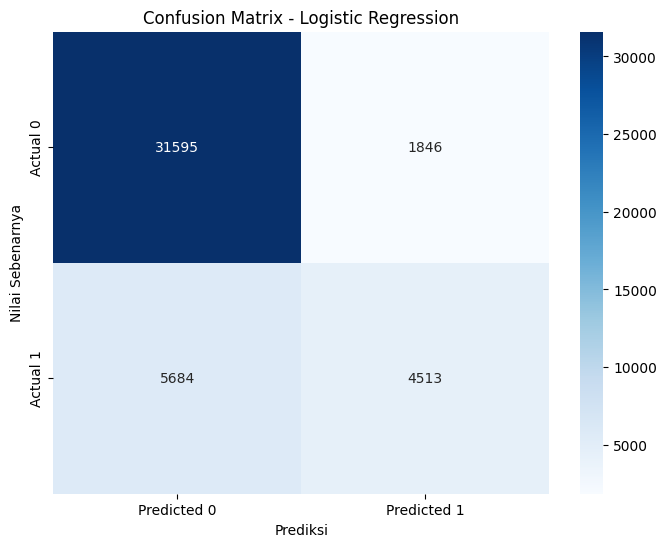

In [54]:
# Membuat confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()


Confusion Matrix Logistic Regression menunjukkan 31.595 + 4.513 = 36.108 prediksi benar dan 5.684 + 1.846  = 7530 prediksi salah. Hasil confusion matrix menunjukkan bahwa model memiliki kecenderungan untuk memprediksi dengan baik kelas mayoritas ("NotRaintomorrow") tetapi mengalami kesulitan dalam memprediksi kelas minoritas ("RainTomorrow"). Terdapat jumlah false positive yang cukup tinggi, yang berarti model cenderung salah memprediksi cuaca NotRaintomorrow. Penyempurnaan perlu dilakukan untuk meningkatkan kinerja model dalam memprediksi cuaca RainTomorrow agar lebih seimbang dan akurat.


In [55]:
# Membuat classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     33441
           1       0.71      0.44      0.55     10197

    accuracy                           0.83     43638
   macro avg       0.78      0.69      0.72     43638
weighted avg       0.82      0.83      0.81     43638




Dari hasil analisis, dapat disimpulkan bahwa model Logistic Regression memiliki tingkat keakuratan yang baik dalam memprediksi kelas "NotRainTomorrow" (kelas 0) dengan tingkat kebenaran sekitar 85%. Namun, model ini cenderung kurang akurat dalam memprediksi kelas "RainTomorrow" (kelas 1) dengan tingkat kebenaran sekitar 71%. Dalam hal mengidentifikasi data yang sebenarnya adalah "NotRainTomorrow", model memiliki tingkat keberhasilan sekitar 94%, sementara dalam mengidentifikasi data yang sebenarnya adalah "RainTomorrow", tingkat keberhasilannya hanya sekitar 44%. Secara keseluruhan, model Logistic Regression memiliki kinerja yang baik dengan akurasi sekitar 83%, tetapi perlu diperhatikan kinerja model dalam memprediksi kelas minoritas (RainTomorrow).

### 7.2 Support Vector Machine (SVM) 

In [56]:
# Membuat model SVM dan melatihnya dengan training set
model_svm = SVC(random_state=0)
model_svm.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_svm = model_svm.predict(X_test)

In [57]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_svm.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_svm.score(X_test, y_test)))

Train Score: 0.8395
Test Score:  0.8380


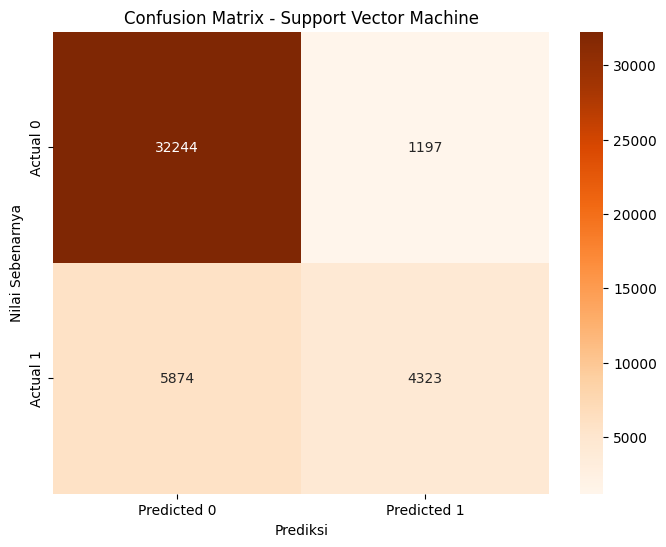

In [58]:
# Membuat confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()


Confusion Matrix Support Vector Machine menunjukkan 32244 + 4323 = 36567 prediksi benar dan 5874 + 1197 = 7071 prediksi salah. Berdasarkan hasil confusion matrix dari algoritma SVM, dapat disimpulkan bahwa model ini memiliki performa yang baik dalam memprediksi kelas 0 ("tidak hujan besok"), namun masih kesulitan dalam memprediksi kelas 1 ("hujan besok"). Model ini cenderung memprediksi cuaca tidak hujan padahal sebenarnya akan hujan

In [59]:
# Membuat classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     33441
           1       0.78      0.42      0.55     10197

    accuracy                           0.84     43638
   macro avg       0.81      0.69      0.73     43638
weighted avg       0.83      0.84      0.82     43638



Model memiliki presisi (precision) sebesar 0.85 untuk kelas 0 dan 0.78 untuk kelas 1, yang berarti sekitar 85% data prediksi kelas 0 dan 78% data prediksi kelas 1 benar-benar sesuai dengan kelas aktualnya. Recall (sensitivitas) untuk kelas 0 adalah 0.96, menunjukkan bahwa sekitar 96% data kelas 0 berhasil dideteksi dengan benar, namun recall untuk kelas 1 hanya sekitar 42%. F1-score untuk kelas 0 adalah 0.90, sedangkan untuk kelas 1 adalah 0.55, menunjukkan performa yang lebih baik dalam memprediksi kelas 0. Akurasi model adalah 0.84, artinya sekitar 84% data berhasil diprediksi dengan benar. Meskipun model memiliki akurasi yang tinggi, performa dalam memprediksi kelas minoritas (kelas 1) masih perlu ditingkatkan

### 7.3 Naive Bayes

In [60]:
# Membuat model Naive Bayes dan melatihnya dengan training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_nb = model_nb.predict(X_test)

In [61]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_nb.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_nb.score(X_test, y_test)))

Train Score: 0.7714
Test Score:  0.7715


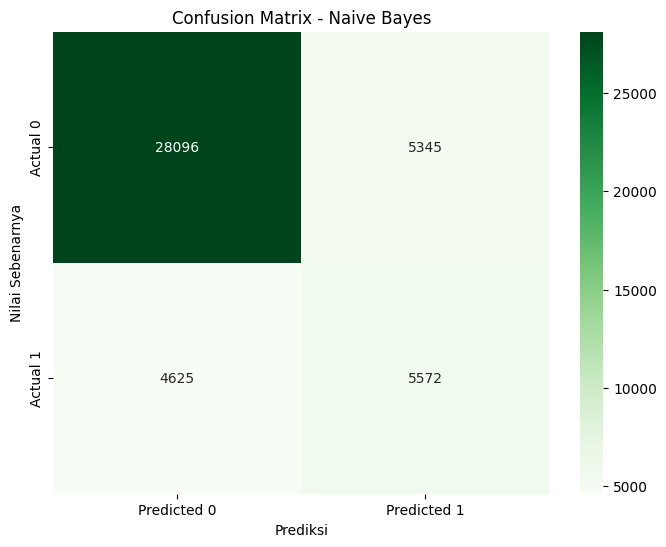

In [62]:
# Membuat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 


Model Naive Bayes memprediksi 28.096 data dengan benar sebagai kelas 0 dan juga benar secara aktual. Namun, terdapat 5.345 data yang diprediksi sebagai kelas 1 padahal sebenarnya kelasnya adalah 0. Selain itu, terdapat 4.625 data yang diprediksi sebagai kelas 0 padahal sebenarnya kelasnya adalah 1. Model memiliki performa yang baik dalam memprediksi kelas 0, namun mengalami kesulitan dalam memprediksi kelas 1 dengan jumlah false positive yang tinggi. Hal ini menunjukkan kecenderungan model untuk memprediksi cuaca tidak hujan padahal sebenarnya cuaca akan hujan. Diperlukan analisis lebih lanjut dan penyesuaian pada model Naive Bayes.

In [63]:
# Membuat classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     33441
           1       0.51      0.55      0.53     10197

    accuracy                           0.77     43638
   macro avg       0.68      0.69      0.69     43638
weighted avg       0.78      0.77      0.77     43638



Model Naive Bayes memiliki precision yang baik untuk kelas mayoritas (kelas 0) sekitar 86%, namun performanya rendah untuk kelas minoritas (kelas 1) dengan precision sekitar 51%. Recall untuk kelas 0 adalah sekitar 84%, sementara untuk kelas 1 adalah sekitar 55%. F1-score untuk kelas 0 adalah 0.85, dan untuk kelas 1 adalah 0.53. Akurasinya mencapai 77%. Model ini lebih baik dalam memprediksi kelas mayoritas dan memerlukan optimasi untuk meningkatkan prediksi kelas minoritas.

### 7.4 Random Forest

In [64]:
# Membuat model Random Forest dan melatihnya dengan training set
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_rf = model_rf.predict(X_test)

In [65]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_rf.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_rf.score(X_test, y_test)))

Train Score: 0.9599
Test Score:  0.8107


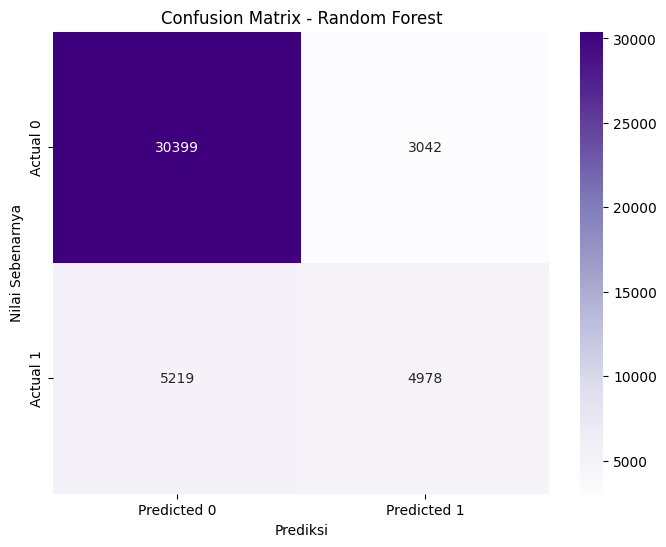

In [66]:
# Membuat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 

Model Random Forest memiliki performa yang baik dalam memprediksi kelas mayoritas (kelas 0) dengan jumlah true negative yang tinggi (30.399). Namun, model memiliki kesulitan dalam memprediksi kelas minoritas (kelas 1) dengan jumlah false positive yang cukup tinggi (3.042). Hal ini menunjukkan kecenderungan model untuk memprediksi cuaca tidak hujan (kelas 0) ketika sebenarnya cuaca akan hujan (kelas 1).

In [67]:
# Membuat classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     33441
           1       0.62      0.49      0.55     10197

    accuracy                           0.81     43638
   macro avg       0.74      0.70      0.71     43638
weighted avg       0.80      0.81      0.80     43638



Dalam model Random Forest, sekitar 85% data yang diprediksi sebagai kelas 0 benar-benar kelas 0, sedangkan sekitar 62% data yang diprediksi sebagai kelas 1 adalah benar-benar kelas 1. Model memiliki sensitivitas yang baik dalam mendeteksi kelas 0 (91%), namun memiliki tingkat recall yang rendah untuk kelas 1 (49%). F1-score untuk kelas 0 adalah 0.88, sedangkan untuk kelas 1 adalah 0.55. Dengan akurasi sebesar 81%, model memiliki performa yang baik dalam memprediksi kelas mayoritas (kelas 0). 

### 7.5 Decision Tree

In [68]:
# Membuat model Decision Tree dan melatihnya dengan training set
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_dt = model_dt.predict(X_test)

In [69]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_dt.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_dt.score(X_test, y_test)))

Train Score: 0.9599
Test Score:  0.7777


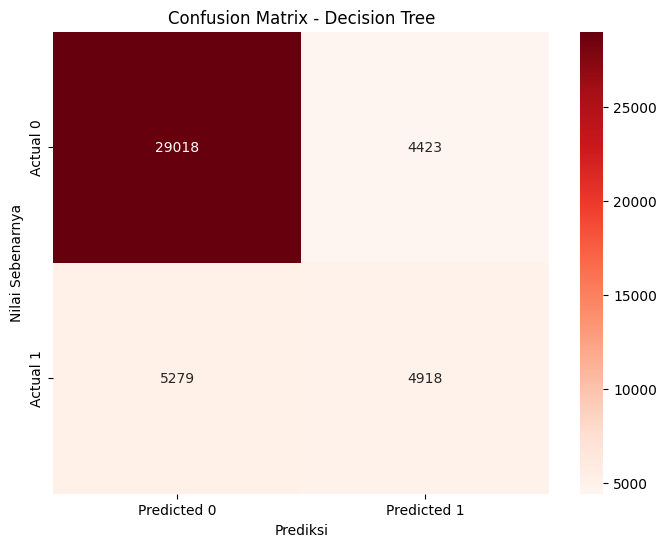

In [70]:
# Membuat confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

Confusion Matrix Logistic Regression menunjukkan 29018 + 4.918 = 33936 prediksi benar dan 4423 + 5279 = 9702 prediksi salah. Model Decision Tree memiliki performa yang baik dalam memprediksi kelas 0 ("tidak hujan besok"), dengan 29.018 data yang diprediksi benar sebagai kelas 0 secara aktual. Namun, model memiliki kesulitan dalam memprediksi kelas 1 ("hujan besok"), terlihat dari jumlah false positive yang mencapai 4.423 data. Meskipun model berhasil memprediksi 4.918 data dengan benar sebagai kelas 1, namun masih terdapat kekurangan dalam mendeteksi sebagian besar data kelas 1. Terdapat kecenderungan model untuk memprediksi cuaca tidak hujan (kelas 0) padahal sebenarnya cuaca akan hujan (kelas 1).

In [71]:
# Membuat classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     33441
           1       0.53      0.48      0.50     10197

    accuracy                           0.78     43638
   macro avg       0.69      0.68      0.68     43638
weighted avg       0.77      0.78      0.77     43638



Model Decision Tree memiliki performa yang cukup baik dalam memprediksi kelas mayoritas (kelas 0) dengan presisi sekitar 85% dan recall sekitar 87%. Namun, model memiliki performa yang lebih rendah dalam memprediksi kelas minoritas (kelas 1) dengan presisi sekitar 53% dan recall sekitar 48%. Akurasi model mencapai 78%. Meskipun memiliki presisi dan recall yang tinggi untuk kelas 0, perlu dilakukan perbaikan untuk meningkatkan deteksi kelas 1.

## **8. Model Inference**

In [78]:
model_inference = {
    "Humidity9am":[11.9,4.5, 48, 57],
    "Rainfall":[0.2, 0.2, 0.5, 0.7],
    "WindGustSpeed":[51.0, 72.0, 26.0, 37.0],
    "Humidity3pm":[65.0, 30.0, 21.4,5.62],
    "RainToday":[1, 0, 1, 0],
}

data_uji = pd.DataFrame(model_inference)
data_uji.head()

,Humidity9am,Rainfall,WindGustSpeed,Humidity3pm,RainToday
0,11.9,0.2,51.0,65.00,1
1,4.5,0.2,72.0,30.00,0
2,48.0,0.5,26.0,21.40,1
3,57.0,0.7,37.0,5.62,0


In [80]:
#normalisasi nilai pada fitur
data_uji = scaler.fit_transform(data_uji)

array([[0.14095238, 0.        , 0.54347826, 1.        , 1.        ],
       [0.        , 0.        , 1.        , 0.41057595, 0.        ],
       [0.82857143, 0.6       , 0.        , 0.26574604, 1.        ],
       [1.        , 1.        , 0.23913043, 0.        , 0.        ]])

In [82]:
pred1 = model_lr.predict(data_uji)
pred2 = model_svm.predict(data_uji)
pred3 = model_nb.predict(data_uji)
pred4 = model_rf.predict(data_uji)
pred5 = model_dt.predict(data_uji)


print("Logistic Regression Model = ",pred1)
print("Support Virtual Machine Model = ",pred2)
print("Naive Bayes = ",pred3)
print("Random Forest = ",pred4)
print("Decision Tree = ",pred5)

Logistic Regression Model =  [0 0 0 0]
Support Virtual Machine Model =  [1 0 0 0]
Naive Bayes =  [1 0 0 0]
Random Forest =  [1 0 0 0]
Decision Tree =  [0 0 0 0]


## **9. Kesimpulan**

Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
1. Wilayah Cairns memiliki jumlah hari hujan tertinggi di antara semua wilayah dengan total 980 hari hujan, diikuti oleh Williamtown dengan 1055 hari hujan, dan Portland dengan 1094 hari hujan. Sementara itu, wilayah Uluru memiliki jumlah hari hujan yang paling sedikit, yaitu hanya 117 hari hujan selama sepuluh tahun terakhir.
2. Dapat diketahui bahwa rata-rata suhu terendah di australia berada di angka 12.19 derajat.
3. Outlier-outlier yang terdapat pada fitur berhasil di hilangkan dengan menggunakan metode IQR Removal Outlier
4. Berdasarkan fitur yang tersedia, terpilihlah 5 fitur yang memiliki korelasi yang cukup baik terhadap variabel target sehingga digunakan untuk memprediksi hujan, antara lain :**"Rainfall"**, **"WindGustSpeed"**, **"Humidity9am"**, **"Humidity3pm"**, **"RainToday"**,
5. Model SVM menunjukkan kinerja terbaik dengan akurasi tertinggi (0.84), presisi yang baik untuk kedua kelas (0.85 untuk kelas 0 dan 0.78 untuk kelas 1), recall yang tinggi untuk kelas 0 (0.96), serta F1-score yang tinggi untuk kelas 0 (0.90) dan kelas 1 (0.55). SVM juga unggul dalam perbandingan dengan model lain seperti Regresi Logistik, Naive Bayes, Random Forest, dan Decission Tree.